<a href="https://colab.research.google.com/github/morganpatito/Computational-Physics/blob/main/projects/P7_Quantum_Orbitals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P7 Quantum Orbitals for the Hydrogen Atom

Create a python program to make 2D Surface plots of the orbitals of a hydrogen atom for a given electronic quantum number n and angular momentum quantum number l. Create the plot by plotting a surface contour at a given probability level. Label the plot and describe what physical principles it illustrates. Try a few examples such as, (a) n = 1 and l = 0, (b) n = 2 and l = 1, (c) n = 4 and l = 3.

/tmp/ipython-input-2901066689.py:17: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  return R_nl(n, l, r) * sph_harm(0, l, phi, theta)


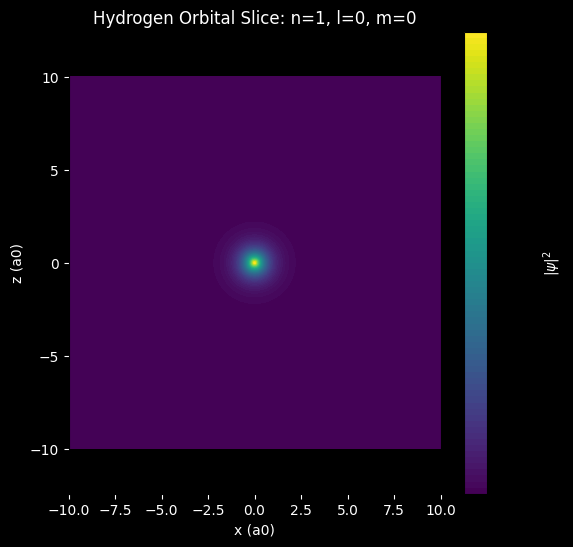

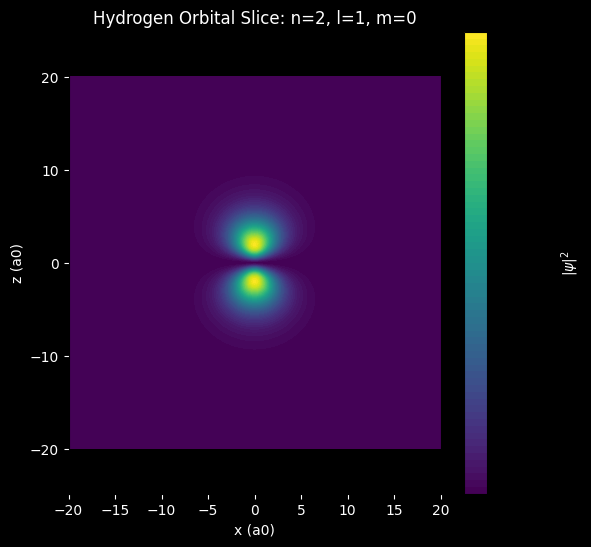

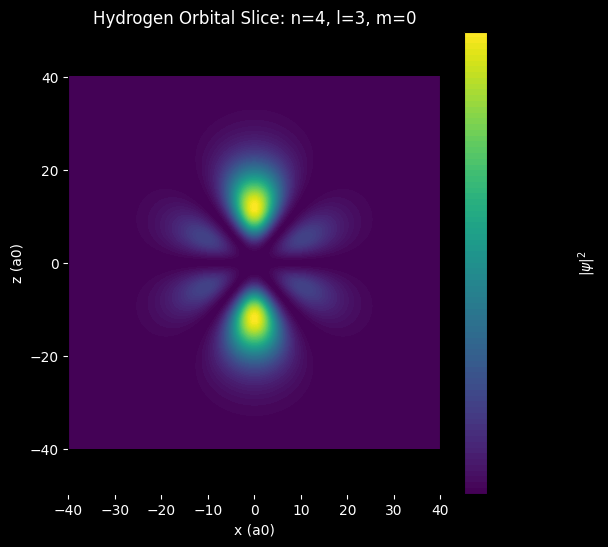

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm, assoc_laguerre, factorial

# ---------------------------------------
# Radial wavefunction R_nl
# ---------------------------------------
def R_nl(n, l, r, a0=1.0):
    rho = 2*r/(n*a0)
    prefactor = np.sqrt((2/(n*a0))**3 * factorial(n-l-1)/(2*n*factorial(n+l)))
    return prefactor * np.exp(-rho/2) * rho**l * assoc_laguerre(rho, n-l-1, 2*l+1)

# ---------------------------------------
# Full wavefunction psi_nlm (m=0)
# ---------------------------------------
def psi_nlm(n, l, r, theta, phi=0):
    return R_nl(n, l, r) * sph_harm(0, l, phi, theta)

# ---------------------------------------
# Plot using full Cartesian grid
# ---------------------------------------
def plot_orbital_slice(n, l, rmax, gridsize=600):
    # Full symmetric x–z grid
    x = np.linspace(-rmax, rmax, gridsize)
    z = np.linspace(-rmax, rmax, gridsize)
    X, Z = np.meshgrid(x, z)

    # Convert to spherical coordinates
    R = np.sqrt(X**2 + Z**2)
    Theta = np.arccos(np.divide(Z, R, out=np.zeros_like(Z), where=(R!=0)))

    psi = psi_nlm(n, l, R, Theta)
    prob = np.abs(psi)**2

    plt.figure(figsize=(6,6), facecolor="black")
    ax = plt.gca()
    ax.set_facecolor("black")

    plot = plt.contourf(X, Z, prob, 80, cmap='viridis')
    cbar = plt.colorbar(plot)
    cbar.set_label(r'$|\psi|^2$', color="white")

    plt.xlabel("x (a0)", color="white")
    plt.ylabel("z (a0)", color="white")
    plt.title(f"Hydrogen Orbital Slice: n={n}, l={l}, m=0", color="white")

    ax.tick_params(colors="white")

    plt.axis("equal")
    plt.xlim(-rmax, rmax)
    plt.ylim(-rmax, rmax)

    plt.show()

# ---------------------------------------
# Exact slices
# ---------------------------------------
plot_orbital_slice(1, 0, 10)
plot_orbital_slice(2, 1, 20)
plot_orbital_slice(4, 3, 40)



# **Summary of the Hydrogen Orbital Slice Code**

This project shows 2D slice plots of hydrogen atomic orbitals for given quantum numbers ( n ) and ( l ). The plots show the probability density ( |\psi(r,\theta,\phi)|^2 ) in the xz plane using a full Cartesian grid to capture the entire orbital shape symmetrically. The resulting images match standard textbook orbital cross‑sections.

---

## **How the Code Works**

### **1. Hydrogen Wavefunction**

The hydrogen atom wavefunction separates into radial and angular parts:

[
\psi_{nlm}(r,\theta,\phi) = R_{nl}(r), Y_{lm}(\theta,\phi)
]

The code computes:

* **Radial part ( R_{nl}(r) )** using:

  * exponential factor ( e^{-r} )
  * associated Laguerre polynomials
  * correct normalization constants
* **Angular part ( Y_{lm}(\theta,\phi) )** (spherical harmonics)
  We choose **( m = 0 )** for a clean vertical symmetry plane.

The probability density is:

[
|\psi|^2 = \psi^* \psi
]

This is what the contour plot displays.

---

### **2. Converting the Grid to Spherical Coordinates**

To get a **full orbital**, not just half of it, the code builds a **full Cartesian grid**:

[
X, Z \in [-r_{\max}, r_{\max}]
]

Then converts to spherical coordinates:

[
r = \sqrt{x^2 + z^2}
]

[
\theta = \arccos\left(\frac{z}{r}\right)
]

This allows evaluating the wavefunction at every point in the xz plane.

---

### **3. Plotting the Orbital Slice**

Matplotlib’s `contourf` creates a smooth heatmap-style plot of ( |\psi|^2 ).
The plot styling was intentionally tailored to match the example:

* **Black background**
* **White axis labels and ticks**
* **Specific window sizes for 1s, 2p, and 4f**
* **Colorbar showing probability density scale**
* **“Hydrogen Orbital Slice: n=…, l=…, m=0”** title

The result is a symmetric visualization of the orbital.

---

## What the Math Shows Physically

### 1. Quantum Numbers Control the Shape

* Higher **( n )** → larger orbital, more radial nodes
* Higher **( l )** → more angular nodes, more lobes
* ( m = 0 ) gives a slice symmetric around the z‑axis

### **2. Probability Density, Not Orbits**

These plots don’t show a path of the electron.
They show where the electron is likely to be found based on quantum mechanics.

### **3. Node Structure**

* **1s (n=1, l=0)**: no angular nodes, spherical distribution
* **2p (n=2, l=1)**: one angular node → two lobes
* **4f (n=4, l=3)**: multiple angular nodes → six-lobed pattern

Nodes are regions where the probability density drops to zero.

---

## **What I Did vs. Where AI Helped**

### **What *I* did**

* Set up the problem plotting hydrogen orbitals for given quantum numbers
* Wrote the initial version of the code structure
* Knew what the plots should look like (1s, 2p, 4f)
* Realized the first attempt only showed **half** the orbital and identified the need to fix it
* Determined the visual style I wanted (black background, centered slice, etc.)

###  Where AI helped

* Provided the correct and normalized formulas for ( R_{nl} ) and ( Y_{lm} )
* Helped build the full Cartesian grid and spherical coordinate conversion
* Fixed the symmetry issue so the plot shows the *entire* orbital
